In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
customer = pd.read_csv('customers.csv', index_col='CustomerKey')
customer.head()

,Prefix,FirstName,LastName,BirthDate,Unnamed: 5,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
CustomerKey,,,,,,,,,,,,,
11000,MR.,JON,YANG,04/08/1966,NaN,M,M,jon24@learnsector.com,"$90,000",2,Bachelors,Professional,Y
11001,MR.,EUGENE,HUANG,14/05/1965,NaN,S,M,eugene10@learnsector.com,"$60,000",3,Bachelors,Professional,N
11002,MR.,RUBEN,TORRES,08/12/1965,NaN,M,M,ruben35@learnsector.com,"$60,000",3,Bachelors,Professional,Y
11003,MS.,CHRISTY,ZHU,15/02/1968,NaN,S,F,christy12@learnsector.com,"$70,000",0,Bachelors,Professional,N
11004,MRS.,ELIZABETH,JOHNSON,08/08/1968,NaN,S,F,elizabeth5@learnsector.com,"$80,000",5,Bachelors,Professional,Y


In [4]:
#checking and dropping null values
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18148 entries, 11000 to 29483
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Prefix          18018 non-null  object 
 1   FirstName       18148 non-null  object 
 2   LastName        18148 non-null  object 
 3   BirthDate       18148 non-null  object 
 4   Unnamed: 5      0 non-null      float64
 5   MaritalStatus   18148 non-null  object 
 6   Gender          18018 non-null  object 
 7   EmailAddress    18148 non-null  object 
 8   AnnualIncome    18148 non-null  object 
 9   TotalChildren   18148 non-null  int64  
 10  EducationLevel  18148 non-null  object 
 11  Occupation      18148 non-null  object 
 12  HomeOwner       18148 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.9+ MB


C:\Users\Seyi\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Seyi\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


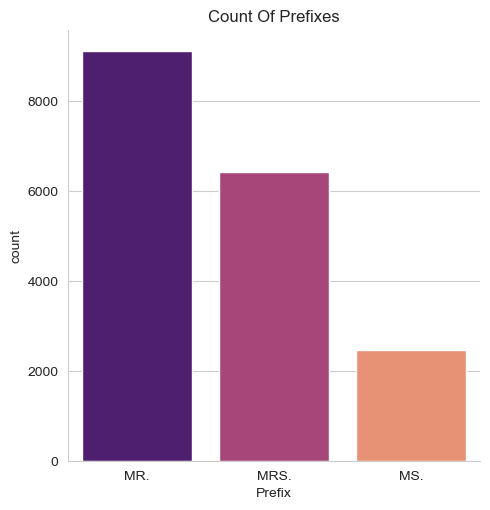

In [5]:
#checking for null values in the column
customer['Prefix'].value_counts(dropna=False)
#dropping null values in the column
customer.dropna(subset='Prefix', inplace=True)
#changing the prefix column data type to category
customer['Prefix'] = customer['Prefix'].astype('category')
#visualizing the count of the prefixes
sns.catplot(kind='count', x='Prefix', data=customer, palette='magma')
plt.title('Count Of Prefixes')
plt.show()

From the chart above, the store has a large customer base of **married and single men** compared to the number of married women who are customers of the store. The store has a higher number of married women purchasing from the store with **single women** being the least number of people that make purchases from the store.

In [6]:
#changing the first name column to title case
customer['FirstName'] = customer['FirstName'].str.title()

In [7]:
#changing the last name column to title case
customer['LastName'] = customer['LastName'].str.title()

C:\Users\Seyi\AppData\Local\Temp\ipykernel_12772\938049472.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prefix_birth['BirthDate'] = prefix_birth['BirthDate'].dt.month
C:\Users\Seyi\AppData\Local\Temp\ipykernel_12772\938049472.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  birth_group = prefix_birth.groupby(['BirthDate', 'Prefix'])['Prefix'].size().reset_index(name='Count')
C:\Users\Seyi\AppData\Local\Temp\ipykernel_12772\938049472.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(kind='line', x='Birt

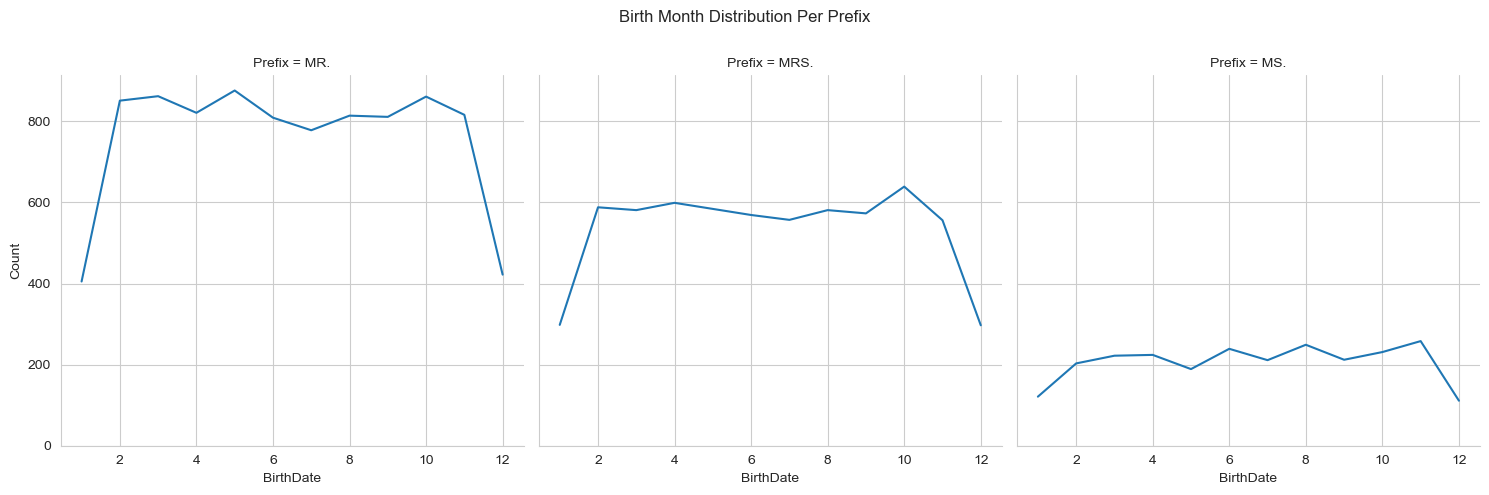

In [8]:
#customer['BirthDate'] = customer['BirthDate'].str.replace('/','-')
#changing to datetime data type
customer['BirthDate'] = pd.to_datetime(customer['BirthDate'], format='mixed', yearfirst=True)
#subsetting the data to see birth count of each prefix per month
prefix_birth = customer[['BirthDate', 'Prefix']]
prefix_birth['BirthDate'] = prefix_birth['BirthDate'].dt.month
birth_group = prefix_birth.groupby(['BirthDate', 'Prefix'])['Prefix'].size().reset_index(name='Count')
#visualizing the data
sns.relplot(kind='line', x='BirthDate', y='Count', col='Prefix', data=birth_group, palette='Set2')
plt.suptitle('Birth Month Distribution Per Prefix')
plt.subplots_adjust(top=.85)
plt.ylim(0)
plt.show()

The number of customers born in the month of **January and December** is the lowest when compared to other month. As we go across the charts, the number reduces across the prefixes, with the **MS** prefix having the lowest number of people born in these months compared to MR and MRS.
A good number of customers celebrate their birthday in the month of **October**.

In [9]:
#dropping the unnamed column
customer.drop(columns='Unnamed: 5', inplace=True, axis=1)

C:\Users\Seyi\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Seyi\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Seyi\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group

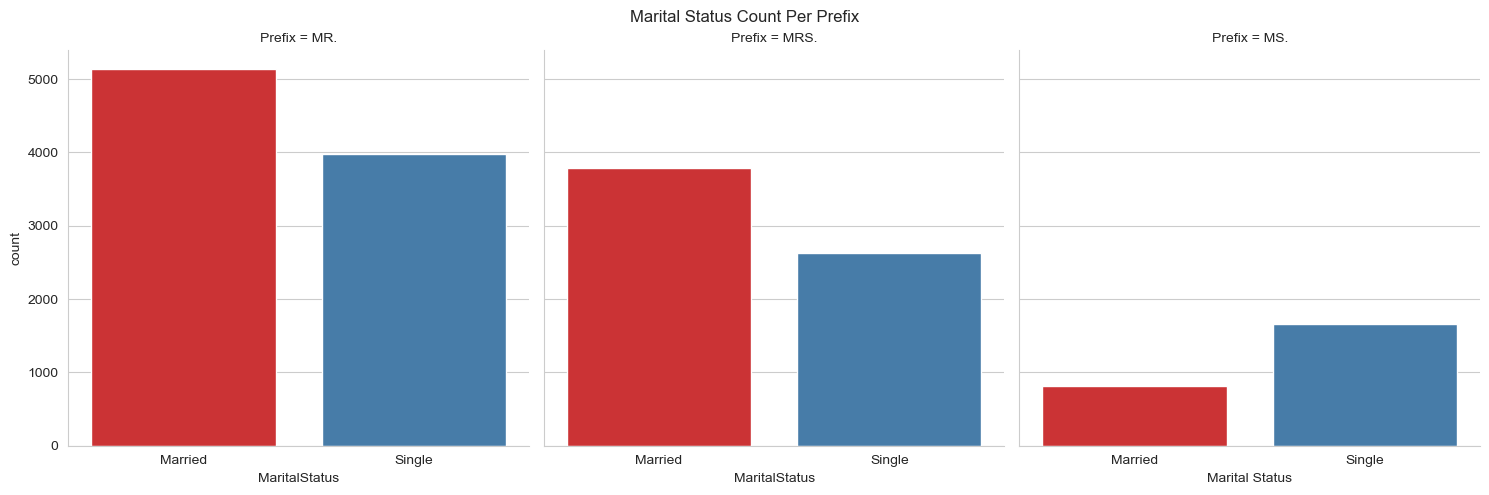

MaritalStatus
Married    9750
Single     8268
Name: count, dtype: int64


In [10]:
#changing the marital status data type to category
customer['MaritalStatus'] = customer['MaritalStatus'].astype('category')
#renaming and updating the categorical values
status_map = {'M':'Married', 'S':'Single'}
customer['MaritalStatus'] = customer['MaritalStatus'].cat.rename_categories(new_categories=status_map)
#visualizing the marital status count per prefix
sns.catplot(kind='count', data=customer, x='MaritalStatus', col='Prefix', palette='Set1')
plt.xlabel('Marital Status')
plt.suptitle('Marital Status Count Per Prefix')
plt.subplots_adjust(top=.9)
plt.show()
print(customer['MaritalStatus'].value_counts())

In [11]:
#changing the gender column data type to category and updating the values
customer['Gender'] = customer['Gender'].astype('category')
gender_cat = {'F':'Female', 'M':'Male'}
customer['Gender'] = customer['Gender'].cat.rename_categories(new_categories=gender_cat)

In [12]:
#cleaning the annual income column
customer['AnnualIncome'] = customer['AnnualIncome'].str.replace('$', '').str.replace(',', '')
customer['AnnualIncome'] = customer['AnnualIncome'].astype('float')

C:\Users\Seyi\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Seyi\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Seyi\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group

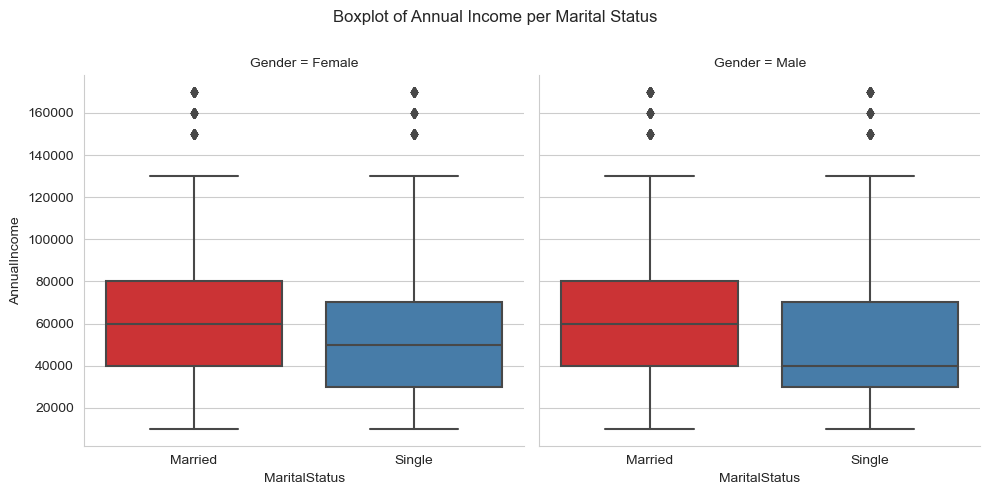

Interquartile range: 40000.0
75th percentile: 70000.0
25th percentile: 30000.0
Upper limit: 130000.0
Lower limit: -30000.0


In [13]:
#dealing with outliers in the dataset using iqr method
#finding the 25th and 75th percentile
twenty_fifth = customer['AnnualIncome'].quantile(0.25)
seventy_fifth = customer['AnnualIncome'].quantile(0.75)
iqr = seventy_fifth - twenty_fifth
#finding the upper and lower limit
upper_thresh = seventy_fifth + (1.5*iqr)
lower_thresh = twenty_fifth - (1.5*iqr)
#subsetting to get the outliers dataframe
outliers = customer[(customer['AnnualIncome'] >= upper_thresh) | (customer['AnnualIncome']<=lower_thresh)]
#visualizing the income distribution
sns.catplot(kind='box', data=customer, x='MaritalStatus', y='AnnualIncome', col = 'Gender', palette='Set1')
plt.ylabel('Annual Income')
plt.suptitle('Boxplot of Annual Income per Marital Status')
plt.subplots_adjust(top=.85)
plt.show()
print(f'Interquartile range: {iqr}\n75th percentile: {seventy_fifth}\n25th percentile: {twenty_fifth}\nUpper limit: {upper_thresh}\nLower limit: {lower_thresh}')

While the range of annual income is the same across the marital status per gender, it is worth noting that **50%** of single men earn **40,000 and below** whereas **50%** of single women earn **50,000 and below** showing us that the average annual income for a single woman is more than that of a single man.
Overall, **25%** of customers earn **30,000 and below**, while **75%** earn **70,000 - 130,000**, and few of the customers earning well above **130,000** hold **Managerial** or **Professional** positions at work.

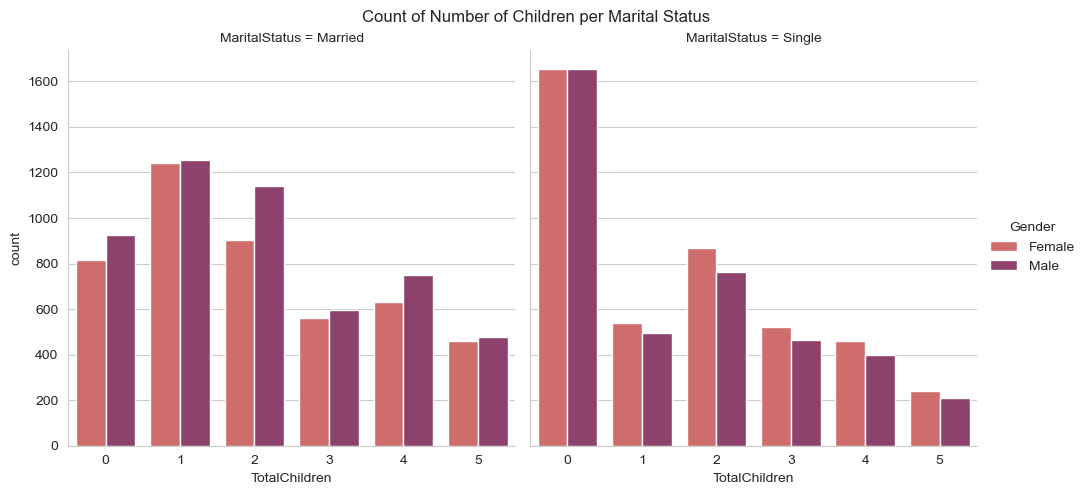

In [14]:
#visualizing the count of the children
sns.catplot(kind='count', x='TotalChildren', hue='Gender', data=customer, palette='flare', col='MaritalStatus')
plt.suptitle('Count of Number of Children per Marital Status')
plt.subplots_adjust(top=.9)
plt.show()

Across both marital status **single men and women** with **0 children** dominate the entire customer base, whilst **married men and women** with **1 child** are dominant among the married category.

C:\Users\Seyi\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


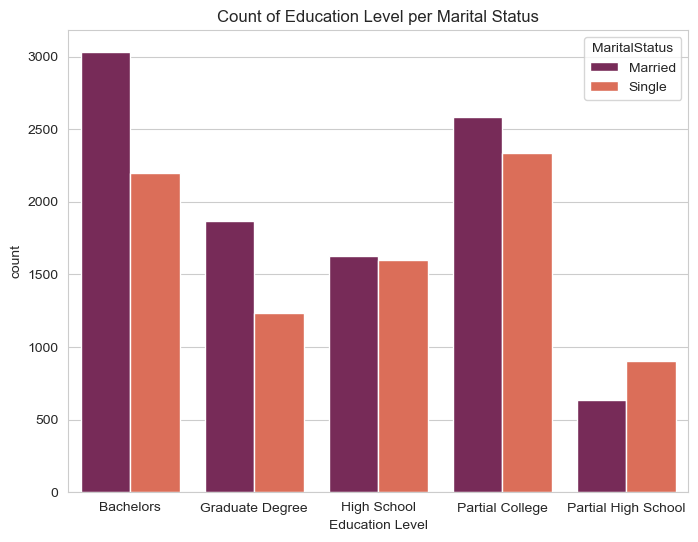

In [15]:
#changing the column data type to category
customer['EducationLevel'] =customer['EducationLevel'].astype('category')
#visualizing the count of the column
plt.figure(figsize=(8,6))
sns.countplot(data=customer, x='EducationLevel', palette='rocket', hue='MaritalStatus')
plt.title('Count of Education Level per Marital Status')
plt.xlabel('Education Level')
plt.show()

A **Bachelors** education is dominant among **married** customers, while as much as there are **single** people with a Bachelors education, a **Partial College** education beats that number by a slight margin.

C:\Users\Seyi\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


C:\Users\Seyi\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Seyi\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Seyi\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group

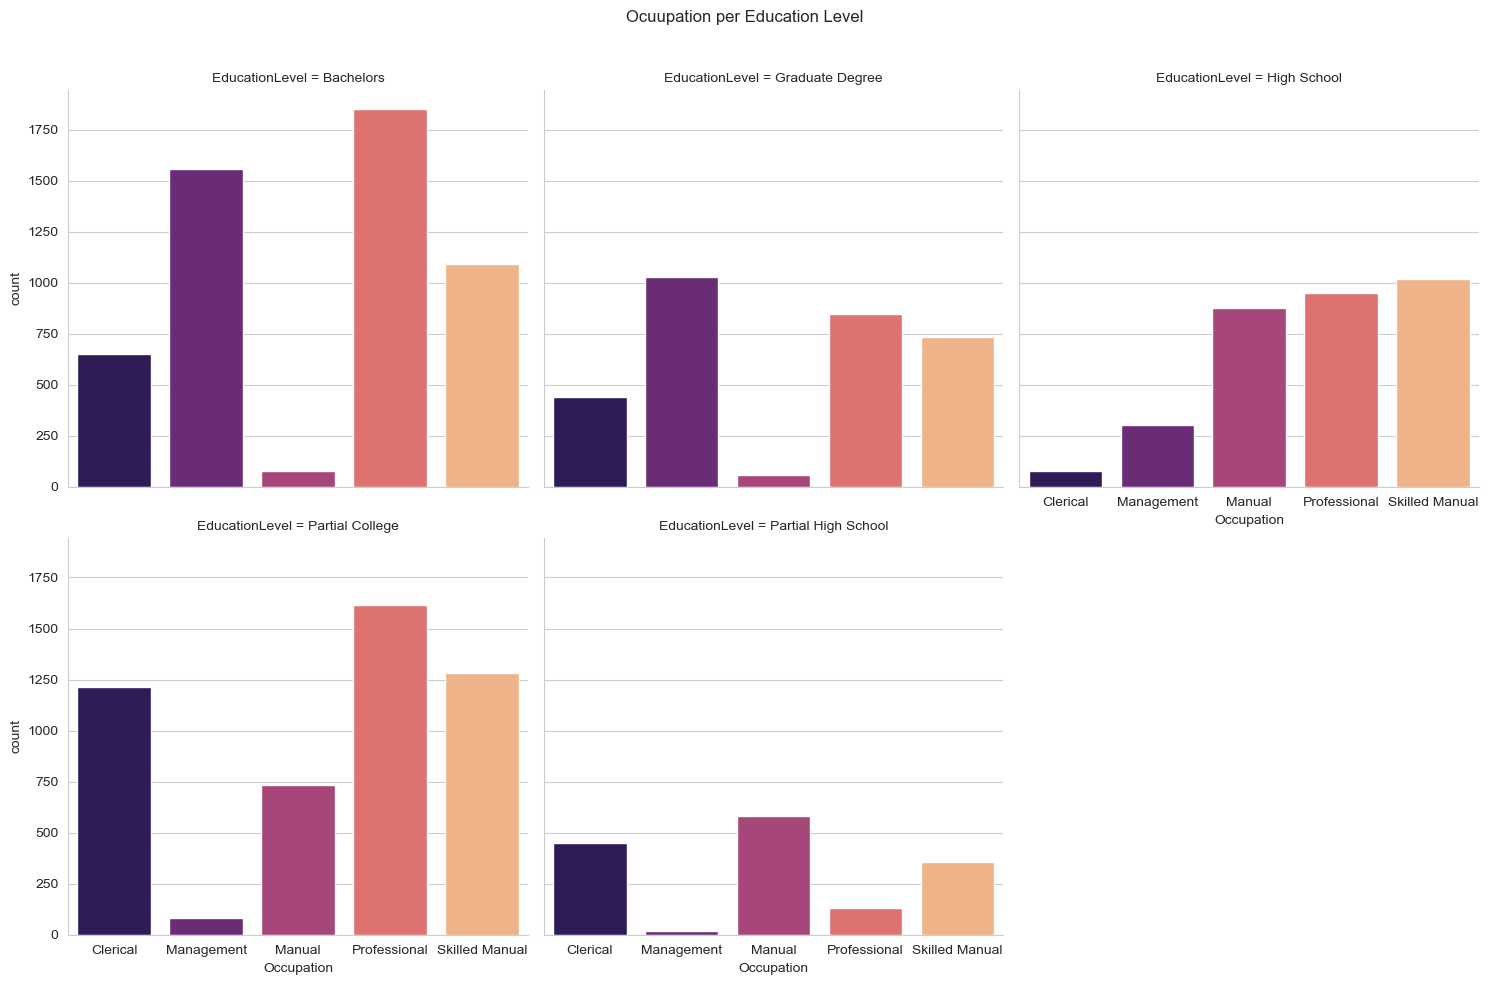

In [16]:
#changing the column data type to category
customer['Occupation'] = customer['Occupation'].astype('category')
#visualizing the count of the column
sns.catplot(data=customer, x='Occupation', palette='magma', col='EducationLevel', kind='count', col_wrap=3)
plt.suptitle('Ocuupation per Education Level')
plt.subplots_adjust(top=.9)
plt.show()

From the charts above, while most customers that possess a **Bachelors** education rarely have **Manual** occupation, they dominate the **Professional** occupation with people who had a **Partial College** education.
**Clerical** occupation is most common among customers with a **Partial College**, they also have one of the least number of people in **Management** occupations along with customers who had a **Partial High School** education.

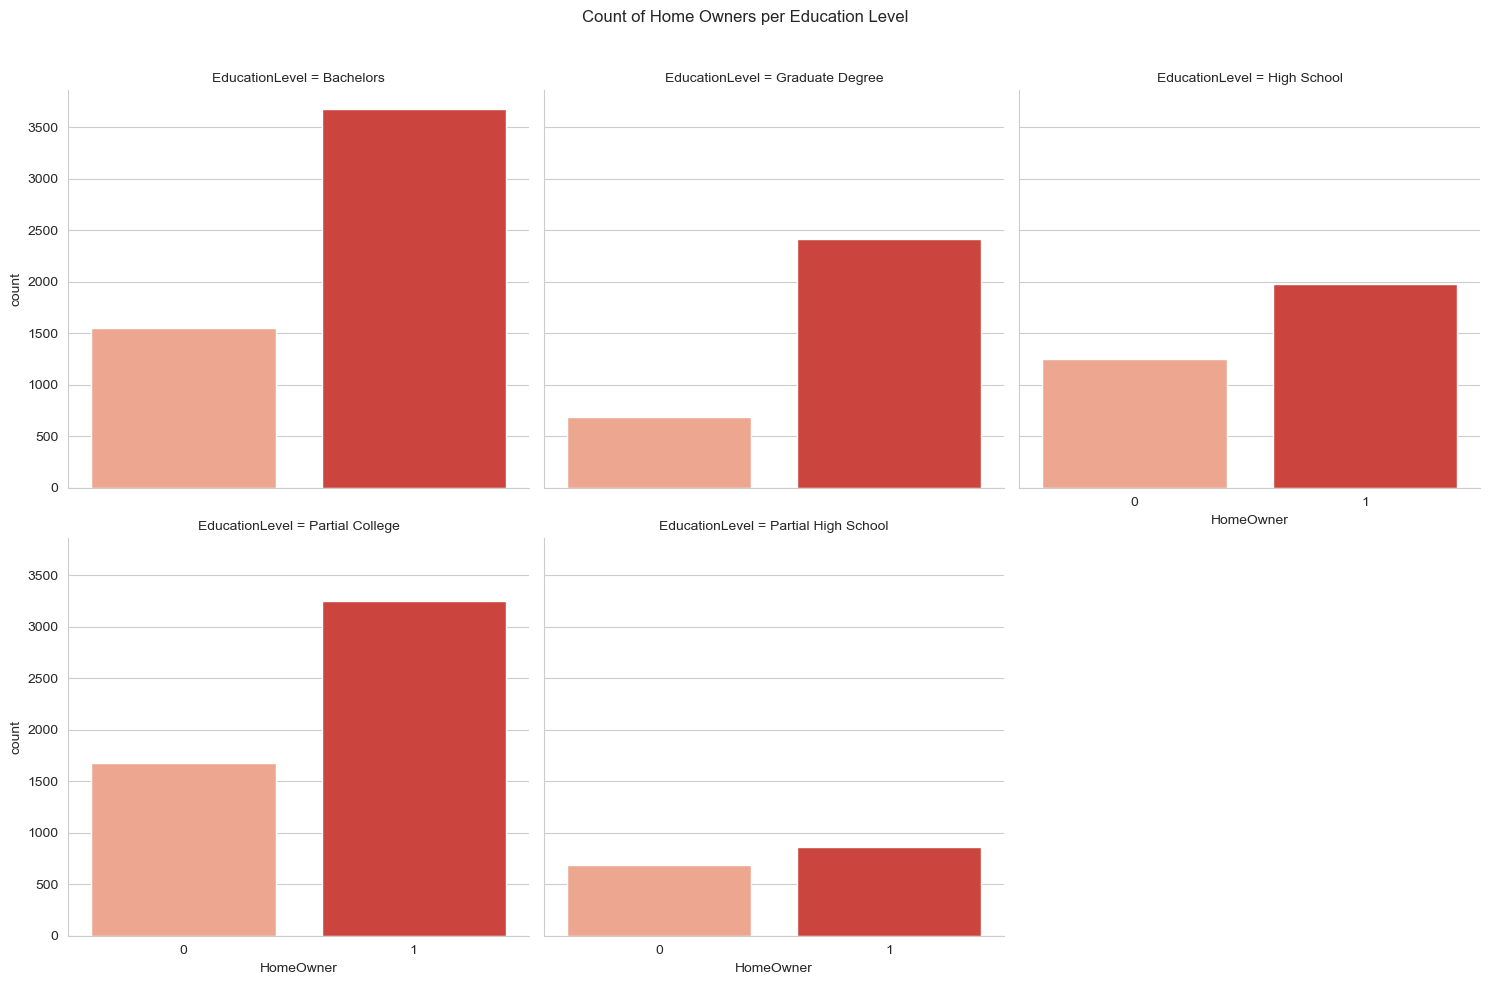

In [18]:
customer['HomeOwner'] = customer['HomeOwner'].astype('category')
customer['HomeOwner'] = customer['HomeOwner'].cat.rename_categories(new_categories={'Y':'Yes', 'N':'No'})
#creating a code map
code = customer['HomeOwner'].cat.codes
categories = customer['HomeOwner']
code_map = dict(zip(code,categories))
#Encoding the column
customer['HomeOwner'] = customer['HomeOwner'].cat.codes
#Visualizing the column
sns.catplot(kind='count', data=customer, x='HomeOwner', palette='Reds', col='EducationLevel', col_wrap=3)
plt.suptitle('Count of Home Owners per Education Level')
plt.subplots_adjust(top=.9)
plt.show()

The largest number of customers that are **home owners** consists of people who had a **Bachelors** or **Partial College** education with customers with a **Graduate** degree following suit with a large difference margin. In as much as a good number of customers with a Graduate degree education are home owners it also has the **least** number of people that aren't home owners, customers with a Partial college education have the **highest** number of people that aren't home owners beating customers with a Bachelors education by a **slight** margin. 